In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell 

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D210_Representation and Reporting\CMS Hospital Readmissions Reduction Program\FY_2023_Hospital_Readmissions_Reduction_Program_Hospital.csv')

In [3]:
df.shape

(18990, 12)

In [11]:
df.head(20)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,1.0301,4.5819,4.4481,Too Few to Report,07/01/2018,06/30/2021
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,202.0,NaN,0.9903,19.1885,19.3765,38,07/01/2018,06/30/2021
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,319.0,NaN,0.9958,14.4888,14.5498,46,07/01/2018,06/30/2021
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,437.0,NaN,0.9568,17.0029,17.7701,71,07/01/2018,06/30/2021
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,757.0,NaN,1.0551,23.0374,21.8333,178,07/01/2018,06/30/2021
5,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,165.0,NaN,0.9836,11.1341,11.3202,18,07/01/2018,06/30/2021
6,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9603,16.2327,16.9033,Too Few to Report,07/01/2018,06/30/2021
7,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2018,06/30/2021
8,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9816,4.1113,4.1886,Too Few to Report,07/01/2018,06/30/2021
9,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-COPD-HRRP,235.0,NaN,0.9034,16.4506,18.2089,31,07/01/2018,06/30/2021


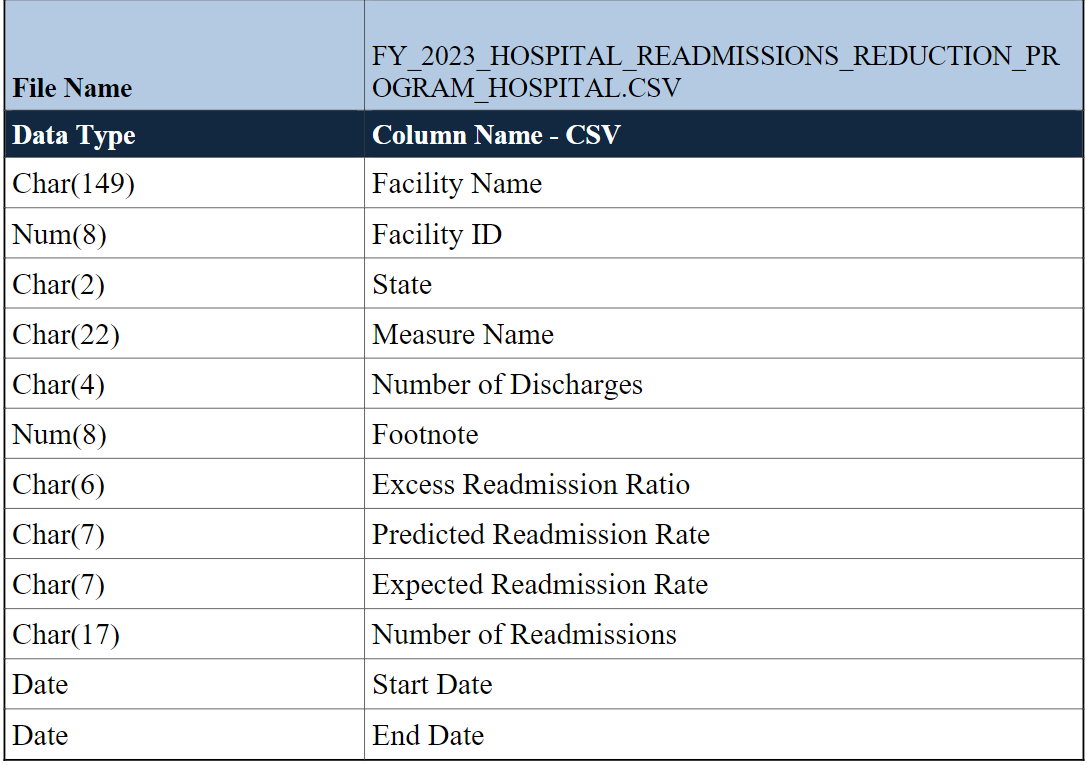

![MeasureName Description](image.png)

The **predicted readmission rate** is the predicted 30-day readmission rate for a hospital based on its performance for its specific patient case mix (that is, the hospital-specific effect in the hospital’s discharge-level data in its Hospital-Specific Report [HSR]).  

The **expected readmission rate** is the expected 30-day readmission rate for a hospital based on readmission rates at an average hospital with a patient case mix similar to that hospital’s (that is, the average effect in the hospital’s discharge-level data in its HSR)

Source: https://qualitynet.cms.gov/inpatient/hrrp/measures

In [5]:
df['Measure Name'].value_counts()

Measure Name
READM-30-HIP-KNEE-HRRP    3165
READM-30-COPD-HRRP        3165
READM-30-AMI-HRRP         3165
READM-30-PN-HRRP          3165
READM-30-HF-HRRP          3165
READM-30-CABG-HRRP        3165
Name: count, dtype: int64

In [6]:
measure_name_mapping = {'READM-30-AMI-HRRP': 'Heart Attack Readmissions',
                         'READM-30-COPD-HRRP': 'COPD Readmissions',
                         'READM-30-CABG-HRRP': 'CABG Readmissions',
                         'READM-30-HF-HRRP': 'Heart Failure Readmissions',
                         'READM-30-HIP-KNEE-HRRP': 'Hip/Knee Readmissions',
                         'READM-30-PN-HRRP': 'Pneumonia Readmissions'}

In [7]:
df = df['Measure Name'].rename(columns=measure_name_mapping)

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [ ]:
df.sort_values('Excess Readmission Ratio', ascending=False)

In [ ]:
df.groupby('Measure Name').apply(lambda x: x.sort_values('Number of Readmissions', ascending=True))